<a href="https://colab.research.google.com/github/Seonghoon-Yu/ISLR-Python/blob/main/Chapter_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 코드 출처
https://github.com/JWarmenhoven/ISLR-python

https://github.com/emredjan/ISL-python

# Chapter 3 선형 회귀(Linear Regression)

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 데이터셋 불러오기
- https://github.com/emredjan/ISL-python 에 업로드 되어 있는 데이터 셋을 불러와서 사용하겠습니다.

In [2]:
# 깃허브를 클론합니다.
!git clone https://github.com/emredjan/ISL-python

Cloning into 'ISL-python'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 203 (delta 3), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (203/203), 16.94 MiB | 27.49 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [3]:
# Advertising.csv 데이터셋을 불러옵니다.
advertising = pd.read_csv('/content/ISL-python/datasets/Advertising.csv', usecols=[1,2,3,4])
advertising.info() # 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# credit.csv 데이터셋을 불러옵니다.
credit = pd.read_csv('/content/ISL-python/datasets/Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1}) # 범주형 자료를 수치형 자료로 변경
credit.head(3) # 위에서 세번째 행까지 출력, Student2 열이 수치형으로 나타납니다.

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


In [7]:
# Auto.csv 데이터셋을 불러옵니다.
auto = pd.read_csv('/content/ISL-python/datasets/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


# 3.1 단순 선형 회귀(Simple Linear Regression)

### Figure 3.1 - Least squares fit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


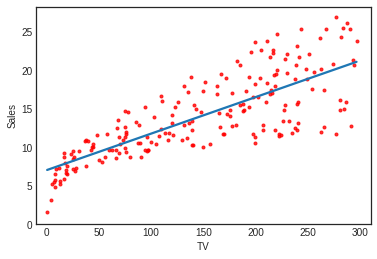

In [8]:
# 데이터를 점으로 나타내면서 선형성도 함께 나타냅니다.
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

### Figure 3.2 - RSS
- 반응 변수: sales
- 설명 변수: TV
- 단순 선형 회귀를 수행합니다.
- 절편과 TV 계수에 따른 RSS 값을 시각화 합니다.

In [11]:
# sales에 대한 TV의 선형 회귀 계수를 추정합니다.
regress = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales

regress.fit(X,y)
print('절편: ',regress.intercept_) # 절편
print('TV 계수: ', regress.coef_)

절편:  14.0225
TV 계수:  [0.04753664]


In [17]:
# 절편과 계수 시각화
B0 = np.linspace(regress.intercept_-2, regress.intercept_+2, 50) # 절편의 구간 설정
B1 = np.linspace(regress.coef_-0.02, regress.coef_+0.02, 50) # TV 계수의 구간 설정
xx, yy = np.meshgrid(B0, B1, indexing='xy') # 그리드 생성
Z = np.zeros((B0.size, B1.size)) # 계수에 따른 RSS 결과값을 담을 배열 생성

# 계수를 기반으로 Z값(RSS) 계산
for (i, j),v in np.ndenumerate(Z):
    Z[i,j] = ((y-(xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/float(1000)

# RSS 최소화
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
# RSS = (y - b0 - b1*X)**2
min_rss = np.sum((regress.intercept_+regress.coef_*X - y.values.reshape(-1,1))**2)/1000
print('RSS 최소값: ',min_rss)

RSS 최소값:  2.1025305831313514


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_te

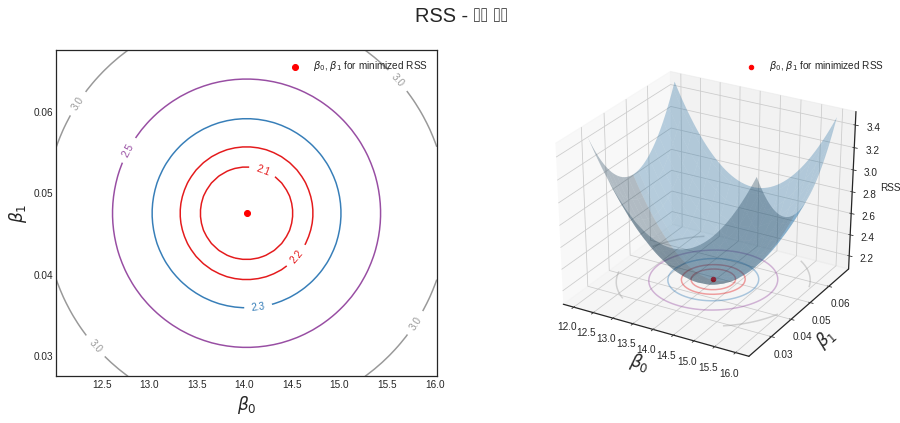

In [18]:
# 시각화
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - 회귀 계수', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# 왼쪽 plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regress.intercept_, regress.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# 오른쪽 plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regress.intercept_, regress.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# plot 설정
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

### 통계값 출력
- 반응 변수: Sales
- 설명 변수: TV

In [19]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [22]:
# RSS = sales - 절편 - 회귀계수 * TV
RSS = ((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000
print('최소 RSS:', RSS)

최소 RSS: 2.102530583131351


### 계수 추정
- 반응 변수: Sales
- 설명 변수: TV

In [24]:
regress = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales

regress.fit(X,y)
print('절편:',regress.intercept_)
print('TV 계수:', regress.coef_)

절편: 7.032593549127695
TV 계수: [0.04753664]


### R2 test

In [27]:
Sales_pred = regress.predict(X)
r2 = r2_score(y, Sales_pred)
print('R2 test:', r2)

R2 test: 0.611875050850071


# 3.2 다중 선형 회귀(Multiple Linear Regression

### Sales에 대한 TV, Radio, Newspaper 세 가지 변수 각각 단순 선형 회귀로 계수 추정

In [29]:
# Sales에 대한 TV, Radio, Newspaper 세 가지 변수 각각 단순 선형 회귀 수행
# TV
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [30]:
# Radio
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [31]:
# Newspaper
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### 세 가지 변수 다중 선형 회귀

In [32]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 03 May 2021   Prob (F-statistic):           1.58e-96
Time:                        08:42:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 상관행렬

In [33]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Radio, TV 두 변수 다중 선형 회귀

In [37]:
# 계수 추정
regress = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']]
y = advertising.Sales

regress.fit(X,y)
print('Radio와 TV의 계수:', regress.coef_)
print('절편:',regress.intercept_)

Radio와 TV의 계수: [0.18799423 0.04575482]
절편: 2.9210999124051398


In [38]:
# 통계값 출력
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


### TV와 Radio에 따른 Sales 값 시각화

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.


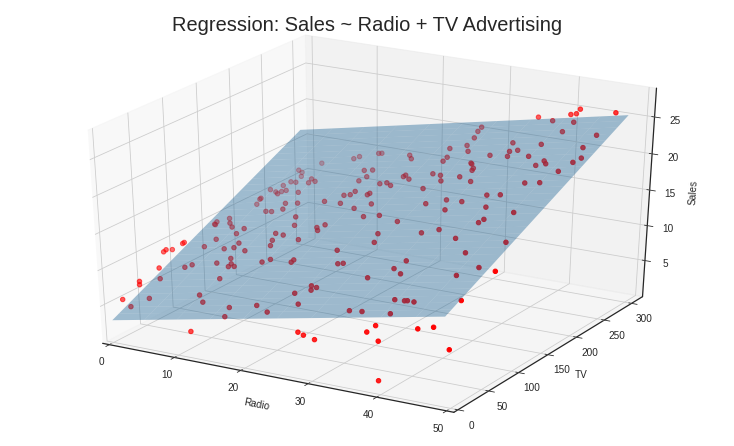

In [39]:
# 좌표 grid 생성
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regress.intercept_ + B1[i,j]*regress.coef_[0] + B2[i,j]*regress.coef_[1])

# plot 생성
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

# 3.3 회귀 모델에서 또 다른 경우

### 질적 자료

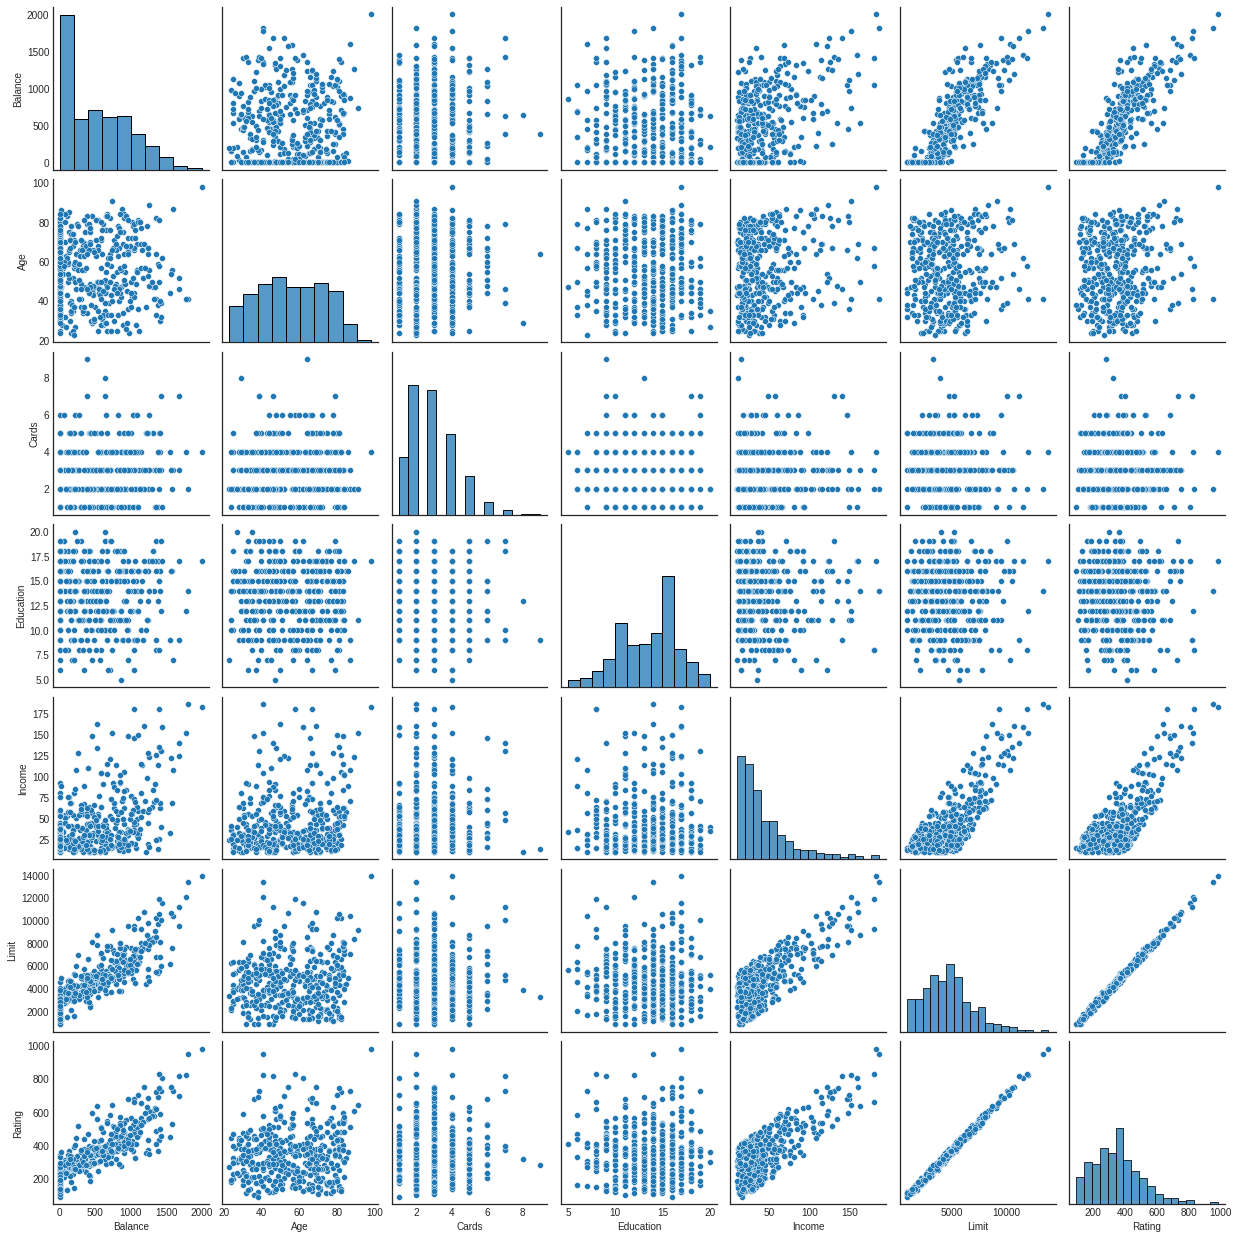

In [40]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

### 더미 변수
- 책에는 더미 변수를 생성하여 질적 자료를 수치화합니다.

- library에서 자동으로 더미 변수를 생성하는 것 같습니다.

In [41]:
# 반응 변수: 신용카드대금
# 설명 변수: 성별
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


In [42]:
# 반응 변수: 신용카드대금
# 설명 변수: 인종
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


### TV와 Radio의 상호작용 효과
- 상호 작용 term을 추가하여 회귀 분석

In [43]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


### 양적 자료와 질적 자료 사이의 상호 작용

In [45]:
# 반응 변수: Balance
# 설명 변수: 학생, 수입

# 상호작용 없이
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regress1 = est1.params
# 상호작용
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regress2 = est2.params

print('Regression 1 - without interaction term')
print(regress1)
print('\nRegression 2 - with interaction term')
print(regress2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


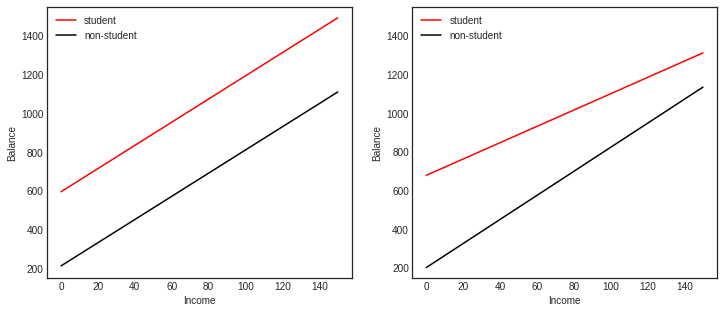

In [46]:
# 시각화

income = np.linspace(0,150) # x-axis

# 상호 작용 없이 Balance 값 (y-axis)
student1 = np.linspace(regress1['Intercept']+regress1['Student2'],
                       regress1['Intercept']+regress1['Student2']+150*regress1['Income'])
non_student1 =  np.linspace(regress1['Intercept'], regress1['Intercept']+150*regress1['Income'])

# 상호 작용을 추가한 Balance 값 (y-axis)
student2 = np.linspace(regress2['Intercept']+regress2['Student2'],
                       regress2['Intercept']+regress2['Student2']+
                       150*(regress2['Income']+regress2['Income:Student2']))
non_student2 =  np.linspace(regress2['Intercept'], regress2['Intercept']+150*regress2['Income'])

# plot 생성하기
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)

### 비선형 관계
- 다항 선형 회귀

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


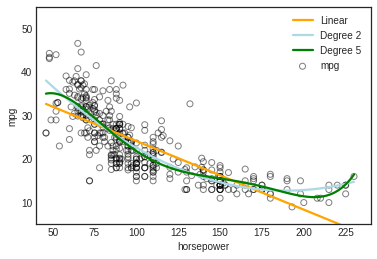

In [48]:
# 데이터 산점도
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', label='mpg', edgecolors='k', alpha=.5)

# 단순 선형 회귀
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')

# 2차 다항 선형 회귀
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')

# 5차 다항 선형 회귀
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')

plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

### 2차 다항 선형 회귀

In [49]:
# X ** 2 변수 생성
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


In [50]:
# 2차 다항 선형 회귀
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


### 잔차 그래프
- 잔차 그래프를 시각화하여 설명 변수와 반응 변수가 비-선형 관계인지 파악할 수 있습니다.

In [51]:
regress = skl_lm.LinearRegression()

# 선형 적합
X = auto.horsepower.values.reshape(-1,1) # 설명 변수 1개
y = auto.mpg
regress.fit(X, y)

auto['pred1'] = regress.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# 2차 형식 적합
X2 = auto[['horsepower', 'horsepower2']] # 2차 계수항 추가
regress.fit(X2, y)

auto['pred2'] = regress.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


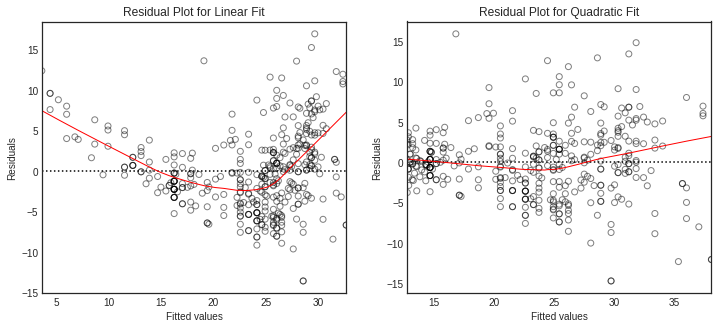

In [52]:
# 잔차 그래프 시각화
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# 왼쪽 plot, 선형 fit에 대한 잔차 그래프
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# 오른쪽 plot, 2차 fit에 대한 잔차 그래프
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

### 공선성(Colinearity)

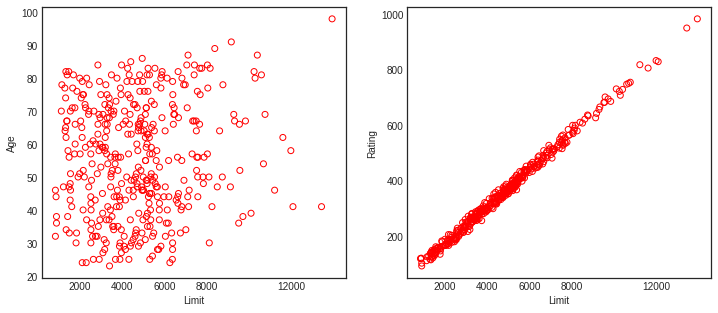

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# 왼쪽 plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# 오른쪽 plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

### 공선성을 갖는 두 설명 변수에 대한 RSS 시각화
- 공선성이 존재하는 경우에 추정된 계수값은 높은 불확실성을 갖습니다.
- 즉, 매우 넓은 표준 오차를 초래합니다. 

In [57]:
y = credit.Balance # 반응 변수: Balance

# 설명 변수: Age, Limint
X = credit[['Age', 'Limit']]
regress1 = skl_lm.LinearRegression()
regress1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regress1.intercept_)
print(regress1.coef_)

# 설명 변수: Rating, Limit (강한 공선성 존재)
X2 = credit[['Rating', 'Limit']]
regress2 = skl_lm.LinearRegression()
regress2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regress2.intercept_)
print(regress2.coef_)

Age/Limit
 520.0150000000001
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[2.20167217 0.02451438]


In [58]:
# 그리드 좌표 생성하기
B_Age = np.linspace(regress1.coef_[0]-3, regress1.coef_[0]+3, 100)
B_Limit = np.linspace(regress1.coef_[1]-0.02, regress1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regress2.coef_[0]-3, regress2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regress2.coef_[1]-0.2, regress2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# 계수에 기반한 RSS
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regress1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regress2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

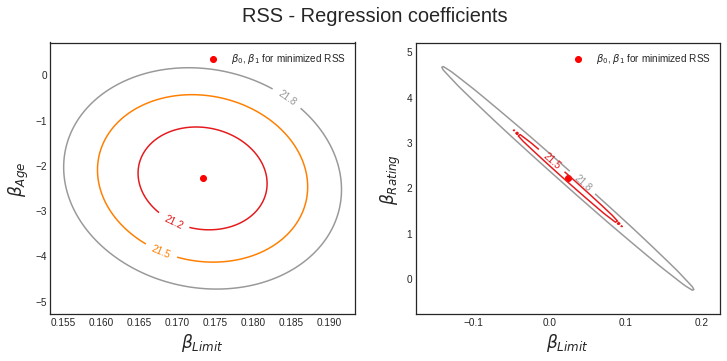

In [59]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# 왼쪽 plot: 공선성이 없는 두 설명 변수
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regress1.coef_[1], regress1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# 오른쪽 plot: 강한 공선성이 존재하는 두 설명 변수
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regress2.coef_[1], regress2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

### VIF(Variance Inflation Factor) 계산
- VIF는 다중 공선성을 판별하기 위해 사용합니다.

In [60]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print('Age의 VIF: ', 1/(1-est_Age.rsquared))
print('Rating의 VIF', 1/(1-est_Rating.rsquared))
print('Limit의 VIF', 1/(1-est_Limit.rsquared))

Age의 VIF:  1.0113846860681328
Rating의 VIF 160.66830095856935
Limit의 VIF 160.59287978597942
